## Setup

In [147]:
import pandas as pd
import numpy as np
import config
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [148]:
from functions import load_taxonomy
X, y = load_taxonomy(boolean=True)
display(X)
display(y)

s__Abiotrophia_defectiva  \
Study Accession Sample Accession or Sample ID                             
PRJDB3601       SAMD00036192                                      False   
                SAMD00036193                                      False   
                SAMD00036194                                      False   
                SAMD00036197                                      False   
                SAMD00036204                                      False   
...                                                                 ...   
N5              SRR5279310                                        False   
                SRR5279311                                        False   
                SRR5279312                                        False   
                SRR5279313                                        False   
V1              rhb_ram_0040                                      False   

                                               s__Acidaminococcus_fermentans  \
Study Accession Sample Accession or Sample ID                                  
PRJDB3601       SAMD00036192                                           False   
                SAMD00036193                                           False   
                SAMD00036194                                           False   
                SAMD00036197                                           False   
                SAMD00036204                                           False   
...                                                                      ...   
N5              SRR5279310                                             False   
                SRR5279311                                             False   
                SRR5279312                                             False   
                SRR5279313                                             False   
V1              rhb_ram_0040                                           False   

                                               s__Acidaminococcus_intestini  \
Study Accession Sample Accession or Sample ID                                 
PRJDB3601       SAMD00036192                                          False   
                SAMD00036193                                          False   
                SAMD00036194                                          False   
                SAMD00036197                                          False   
                SAMD00036204                                          False   
...                                                                     ...   
N5              SRR5279310                                            False   
                SRR5279311                                            False   
                SRR5279312                                            False   
                SRR5279313                                            False   
V1              rhb_ram_0040                                          False   

                                               s__Actinomyces_graevenitzii  \
Study Accession Sample Accession or Sample ID                                
PRJDB3601       SAMD00036192                                          True   
                SAMD00036193                                          True   
                SAMD00036194                                         False   
                SAMD00036197                                          True   
                SAMD00036204                                          True   
...                                                                    ...   
N5              SRR5279310                                           False   
                SRR5279311                                           False   
                SRR5279312                                           False   
                SRR5279313                                            True   
V1              rhb_ram_0040                                      

Phenotype
Study Accession Sample Accession or Sample ID           
PRJDB3601       SAMD00036192                        True
                SAMD00036193                        True
                SAMD00036194                       False
                SAMD00036197                        True
                SAMD00036204                        True
...                                                  ...
N5              SRR5279310                         False
                SRR5279311                         False
                SRR5279312                         False
                SRR5279313                         False
V1              rhb_ram_0040                       False

[5026 rows x 1 columns]

In [149]:
from functions import get_groups
groups = get_groups(X)
groups

array([ 8,  8,  8, ...,  5,  5, 41])

## Logistic Regression

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import numpy as np

In [179]:
strat = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
logo = LeaveOneGroupOut()
loo = LeaveOneOut()

In [187]:
def p_h(estimator, X, y):
    y_hat = estimator.predict(X)
    healthies = y_hat[y]
    num_healthies = len(healthies)
    num_correct = healthies.sum()
    return num_correct / num_healthies

def p_n(estimator, X, y):
    y_hat = estimator.predict(X)
    unhealthies = y_hat[~y]
    num_unhealthies = len(unhealthies)
    num_correct = num_unhealthies - unhealthies.sum()
    return num_correct / num_unhealthies

In [250]:
C = 1

print("C parameter:", C)
logreg = LogisticRegression(C=C, penalty='l1',
fit_intercept=True, max_iter=700, random_state=42, # l1_ratio=0.8,
                    solver='saga', n_jobs=-1, verbose=10)
scores = cross_validate(logreg, X, y.values.ravel(), groups=groups, cv=leave, n_jobs=-1, verbose=10, 
                        scoring={
                            "p_h" : p_h,
                            "p_n" : p_n
                        })

C parameter: 1


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  16 out of  42 | elapsed:    7.6s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done  21 out of  42 | elapsed:   12.7s remaining:   12.7s
[Parallel(n_jobs=-1)]: Done  26 out of  42 | elapsed:   13.0s remaining:    8.0s
[Parallel(n_jobs=-1)]: Done  31 out of  42 | elapsed:   14.1s remaining:    5.0s
[Parallel(n_jobs=-1)]: Done  36 out of  42 | elapsed:   17.3s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   18.0s finished


In [251]:
scores

{'fit_time': array([5.86174822, 5.71738887, 5.43193173, 6.30314016, 6.24304318,
        5.68599105, 6.07160807, 6.21200013, 5.67378306, 5.54930615,
        5.74266291, 7.42167401, 5.45752311, 5.75442362, 5.95014501,
        5.9238441 , 6.44223189, 7.444031  , 7.18575406, 6.77677369,
        7.36460495, 6.40430093, 6.79295897, 6.5200069 , 6.9415381 ,
        9.08081913, 6.96124268, 6.6263442 , 6.655725  , 6.44989705,
        6.69618106, 6.45334411, 4.8616662 , 4.93070102, 4.6435802 ,
        4.72775292, 4.71210766, 4.65202904, 4.58737612, 5.06522584,
        4.59132314, 4.8008492 ]),
 'score_time': array([0.00646687, 0.00875592, 0.03326106, 0.00656009, 0.00688505,
        0.00833106, 0.00681281, 0.00670099, 0.0060811 , 0.00745606,
        0.00973606, 0.00624108, 0.00702882, 0.00668812, 0.00648904,
        0.00719571, 0.00763202, 0.00728178, 0.00809574, 0.00786734,
        0.00679898, 0.00783896, 0.00804305, 0.00820494, 0.00799203,
        0.00592303, 0.00728607, 0.00733495, 0.0085361 , 

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_study_scores(y, scores):
    groupby = y.groupby(y.index.get_level_values(0))
    df = groupby.count()
    df.columns = ['count']
    df['num_healthy'] = groupby.sum()
    df['num_unhealthy'] = df['count'] - df['num_healthy']
    df['test_p_h'] = scores['test_p_h']
    df['test_p_n'] = scores['test_p_n']
    
    sorted_healthy = df.sort_values('num_healthy')
    sorted_healthy = sorted_healthy[sorted_healthy['num_healthy'] > 0]
    
    sorted_unhealthy = df.sort_values('num_unhealthy')
    sorted_unhealthy = sorted_unhealthy[sorted_unhealthy['num_unhealthy'] > 0]
    
    fig, ax = plt.subplots(figsize=(20, 15))
    
    sns.barplot(data=sorted_healthy, x='num_healthy', y='test_p_h', palette='crest')
    plt.xlabel("sample size", fontsize=30)
    plt.ylabel("Accuracy", fontsize=30)
    plt.title("Healthy Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_healthy.png")
    
    fig, ax = plt.subplots(figsize=(20, 15))
    
    sns.barplot(data=sorted_unhealthy, x='num_unhealthy', y='test_p_n', palette='crest')
    plt.xlabel("sample size", fontsize=30)
    plt.ylabel("Accuracy", fontsize=30)
    plt.title("Non-healthy Groups", fontsize=45)
    plt.savefig(config.OUTPUT_DIR + "LOGOCV_unhealthy.png")

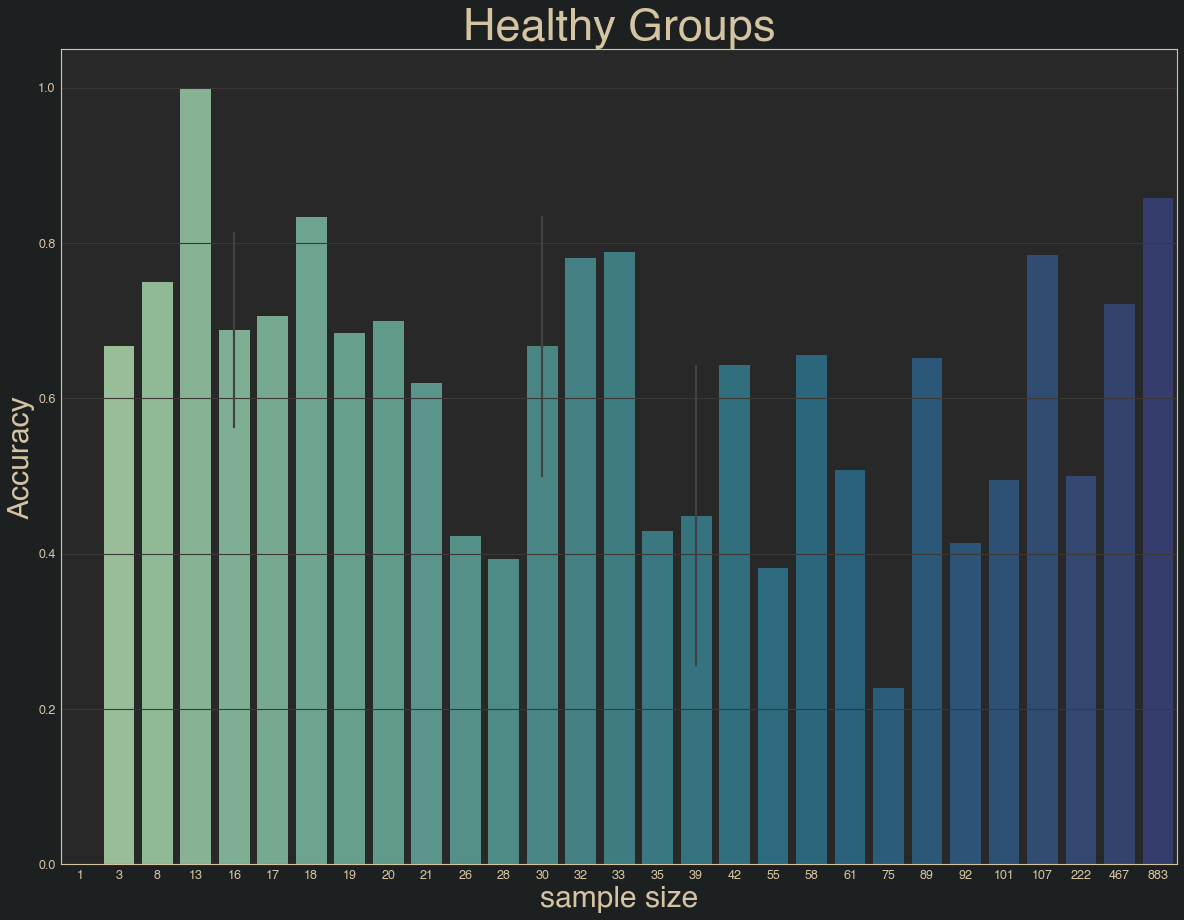

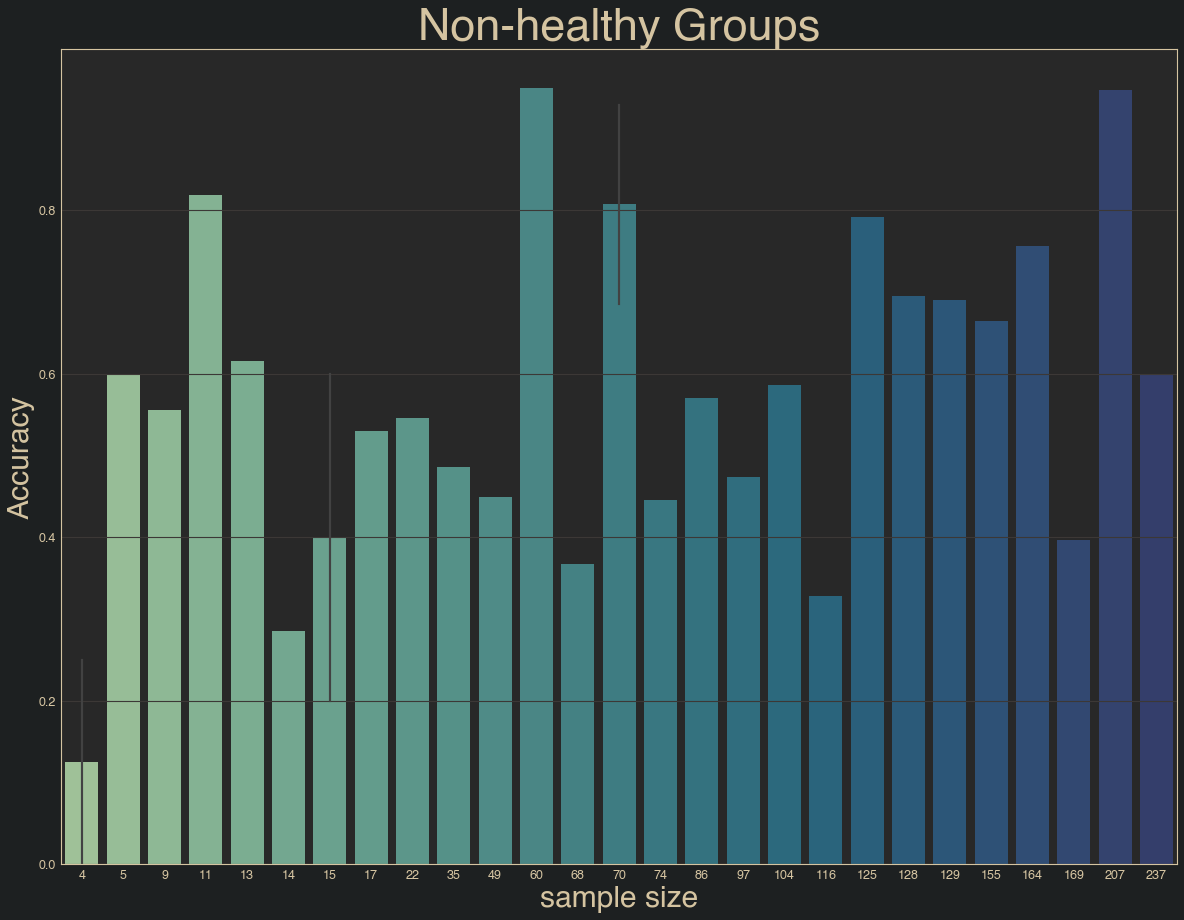

In [253]:
plot_study_scores(y, scores)